In [48]:
import os
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



- Create classification column for df. 
- Create alternative classification for box-office success. 
- Do SVM classification. 
- Do SVM regression. 

# Open data frames 

In [3]:
# Open a datasets directory. 
fd = os.open("/Users/luisalvarez/Documents/GitHub", os.O_RDONLY)

# Use os.fchdir() method to change the current dir/folder.
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/GitHub


In [35]:
# Open csv file. 
Aggregate_data_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Aggregate_Combined_clean.csv')

# Transform data (DVs) to log scale.
Aggregate_data_df["Gross_US_W1_num"] = np.log(Aggregate_data_df["Gross_US_W1_num"])
Aggregate_data_df["Gross_US_W2_num"] = np.log(Aggregate_data_df["Gross_US_W2_num"])
Aggregate_data_df["Gross_US_W3_num"] = np.log(Aggregate_data_df["Gross_US_W3_num"])
Aggregate_data_df["Gross_US_W4_num"] = np.log(Aggregate_data_df["Gross_US_W4_num"])
Aggregate_data_df["Gross_US_M1"] = np.log(Aggregate_data_df["Gross_US_M1"])

# Drop rows with missing values.
Aggregate_data_filtered_df = Aggregate_data_df.copy().dropna(subset=['Budget'])
Aggregate_data_filtered_df.reset_index(drop=True, inplace=True)

print("After dropping movies with missing values, the dataset has", Aggregate_data_filtered_df.shape[0], "rows and", Aggregate_data_filtered_df.shape[1], "columns.")

Aggregate_data_filtered_df.head()


After dropping movies with missing values, the dataset has 26 rows and 65 columns.


,Trailer,Type,Pos_arousal,Neg_arousal,Pos_arousal_scaled,Neg_arousal_scaled,W_score,W_score_scaled,NAcc_onset,AIns_onset,...,Total_Theaters_US,Total_weeks,Weeks_avg_per_theater,Gross_World_num,Released_Month,Budget,IMDb_rating,IMDb_vote,Gross_US_M1,Theaters_US_M1
0,rc1,comedy,1.778694,-0.320190,0.364480,-0.320190,3.107143,0.866071,0.029611,-0.116781,...,6041.0,4.0,2.0,15518636.0,7.0,20000000.0,7.0,9400.0,16.372566,6041.0
1,rc10,comedy,1.543847,-0.304939,0.129634,-0.304939,2.481481,0.229167,-0.046373,-0.115710,...,9026.0,7.0,3.0,13021859.0,8.0,17000000.0,6.0,2.0,16.354026,8478.0
2,rc12,comedy,1.327725,-0.287918,-0.086488,-0.287918,1.888889,-0.428241,-0.098935,-0.098037,...,6570.0,7.0,3.0,17657217.0,5.0,29100000.0,6.0,3900.0,16.273523,6161.0
3,rc2,comedy,1.328290,-0.268451,-0.085923,-0.268451,1.896552,-0.409483,-0.014134,-0.070817,...,15397.0,7.0,4.0,40384027.0,2.0,28000000.0,6.0,7600.0,17.439141,13367.0
4,rc3,comedy,1.523302,-0.324938,0.109088,-0.324938,2.740741,0.495370,0.049353,0.066683,...,24008.0,15.0,6.0,108641148.0,1.0,50000000.0,8.0,43000.0,17.486808,8245.0


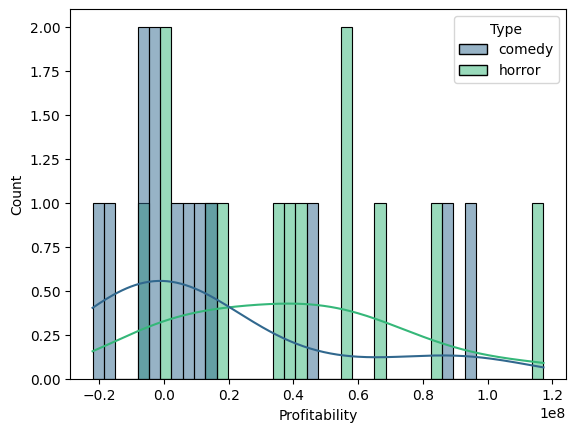

In [37]:
# Create new column for box-office classification and profitability of each movie.
Aggregate_data_filtered_df.loc[:, "Class"] = np.zeros(len(Aggregate_data_filtered_df))
Aggregate_data_filtered_df.loc[:, "Profitability"] = Aggregate_data_filtered_df["Gross_Total_US"] - Aggregate_data_filtered_df["Budget"]

hist = sns.histplot(data=Aggregate_data_filtered_df, x="Profitability", hue="Type", kde=True, palette="viridis", bins=40)

In [40]:
# Classify box-office performance.
for trailier_id in range(int(Aggregate_data_filtered_df.shape[0])):

    trailer_profit = Aggregate_data_filtered_df.loc[trailier_id, "Profitability"]

    if (trailer_profit < 500000):
        Aggregate_data_filtered_df.loc[trailier_id, "Class"] = 1 # Classify as flop.
    elif((trailer_profit > 500000) and (trailer_profit < 1000000)):
        Aggregate_data_filtered_df.loc[trailier_id, "Class"] = 2
    elif((trailer_profit > 1000000) and (trailer_profit < 40000000)):
        Aggregate_data_filtered_df.loc[trailier_id, "Class"] = 3
    elif((trailer_profit > 40000000) and (trailer_profit < 150000000)):
        Aggregate_data_filtered_df.loc[trailier_id, "Class"] = 4
    else:
        Aggregate_data_filtered_df.loc[trailier_id, "Class"] = 5

Aggregate_data_filtered_df.head(26)


,Trailer,Type,Pos_arousal,Neg_arousal,Pos_arousal_scaled,Neg_arousal_scaled,W_score,W_score_scaled,NAcc_onset,AIns_onset,...,Weeks_avg_per_theater,Gross_World_num,Released_Month,Budget,IMDb_rating,IMDb_vote,Gross_US_M1,Theaters_US_M1,Class,Profitability
0,rc1,comedy,1.778694,-0.320190,0.364480,-0.320190,3.107143,0.866071,0.029611,-0.116781,...,2.0,15518636.0,7.0,20000000.0,7.0,9400.0,16.372566,6041.0,1.0,-7102211.0
1,rc10,comedy,1.543847,-0.304939,0.129634,-0.304939,2.481481,0.229167,-0.046373,-0.115710,...,3.0,13021859.0,8.0,17000000.0,6.0,2.0,16.354026,8478.0,1.0,-3986310.0
2,rc12,comedy,1.327725,-0.287918,-0.086488,-0.287918,1.888889,-0.428241,-0.098935,-0.098037,...,3.0,17657217.0,5.0,29100000.0,6.0,3900.0,16.273523,6161.0,1.0,-17010609.0
3,rc2,comedy,1.328290,-0.268451,-0.085923,-0.268451,1.896552,-0.409483,-0.014134,-0.070817,...,4.0,40384027.0,2.0,28000000.0,6.0,7600.0,17.439141,13367.0,3.0,11448525.0
4,rc3,comedy,1.523302,-0.324938,0.109088,-0.324938,2.740741,0.495370,0.049353,0.066683,...,6.0,108641148.0,1.0,50000000.0,8.0,43000.0,17.486808,8245.0,3.0,14267657.0
5,rc4,comedy,1.825153,-0.369021,0.410939,-0.369021,3.250000,1.008929,-0.000217,-0.005031,...,11.0,485252376.0,12.0,90000000.0,8.0,46000.0,18.347787,16232.0,4.0,96090535.0
6,rc5,comedy,1.587900,-0.183105,0.173686,-0.183105,2.571429,0.276786,0.018259,0.064336,...,4.0,35958110.0,8.0,46000000.0,6.0,12000.0,16.961232,10441.0,1.0,-22011115.0
7,rc7,comedy,1.443221,-0.461644,0.029007,-0.461644,2.142857,-0.098214,0.052734,0.042732,...,3.0,29121628.0,5.0,20000000.0,6.0,2900.0,16.664758,8742.0,1.0,-2418435.0
8,rc8,comedy,1.411664,-0.275233,-0.002550,-0.275233,2.285714,0.044643,-0.012174,-0.043799,...,4.0,83453541.0,6.0,45000000.0,7.0,47000.0,17.689535,11155.0,3.0,5452282.0
9,rh1,horror,1.369421,0.342190,-0.044792,0.342190,2.607143,0.303571,-0.053908,0.052636,...,5.0,136966457.0,10.0,30000000.0,5.0,12000.0,17.926461,13387.0,3.0,35537395.0


In [42]:
Aggregate_data_filtered_df["Profitability"].max()

117275620.0

In [ ]:
# Splitting data for traning and testing.

In [44]:
Aggregate_data_filtered_df.columns

Index(['Trailer', 'Type', 'Pos_arousal', 'Neg_arousal', 'Pos_arousal_scaled',
       'Neg_arousal_scaled', 'W_score', 'W_score_scaled', 'NAcc_onset',
       'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
       'NAcc_offset', 'AIns_offset', 'MPFC_offset', 'NAcc_onset_z',
       'AIns_onset_z', 'MPFC_onset_z', 'NAcc_middle_z', 'AIns_middle_z',
       'MPFC_middle_z', 'NAcc_offset_z', 'AIns_offset_z', 'MPFC_offset_z',
       'NAcc_whole', 'AIns_whole', 'MPFC_whole', 'NAcc_whole_z',
       'AIns_whole_z', 'MPFC_whole_z', 'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC',
       'index', 'number', 'title', 'Domestic Gross', 'Worldwide Gross',
       'Domestic Openning', 'Theaters Num', 'Avg Domestic Opening',
       'Openning_US_C_IMDb', 'Gross_US_C_IMDb', 'Gross_W_IMDb',
       'Gross_US_W1_num', 'Theaters_US_W1_num', 'Gross_US_W2_num',
       'Theaters_US_W2_num', 'Gross_US_W3_num', 'Theaters_US_W3_num',
       'Gross_US_W4_num', 'Theaters_US_W4_num', 'Gross_Total_US',
       

In [50]:
# Extract the relevant data for SVM. 
relevant_cols = ['Pos_arousal_scaled', 'Neg_arousal_scaled', 'NAcc_onset', 'AIns_middle', 'MPFC_offset']
x_data = Aggregate_data_filtered_df[relevant_cols]
gross_w1 = Aggregate_data_filtered_df["Gross_US_W1_num"]

# Standarize data.
sc_X = StandardScaler()
sc_y = StandardScaler()
x_data_sc = sc_X.fit_transform(x_data)
#gross_w1_sc = sc_y.fit_transform(gross_w1)

# Split dataset into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(x_data_sc, gross_w1, test_size=0.3) # 70% training and 30% test



In [ ]:
# Create SVM models with different kernels. 

# svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
